In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x = np.random.uniform(0,1,300)
print(np.sum(x))
v = np.random.uniform(-0.1, 0.1, 300)
d = np.sin(20 * x) + (3 * x) + v
n = 300

145.35073050043394


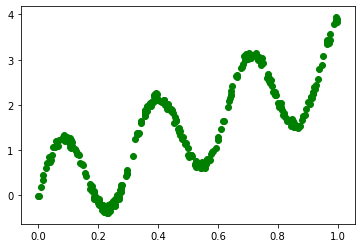

In [3]:
fig, ax = plt.subplots()
plt.scatter(x, d, c='g')
plt.show()


In [4]:
tan_h = lambda x_ : np.tanh(x_)
output_ac_fn = lambda x_: x_
d_tan_h = lambda x_: 1 - (np.tanh(x_)**2)
d_output_ac_fn = lambda x_ : 1

N = 24

weight_input = np.random.normal(0,1/np.sqrt(24),N)
weight_output = np.random.normal(0,1/np.sqrt(24),N)
#weight_layer_1 = np.random.uniform(-5,5, size=(N,2))
bias_l1 = np.random.normal(0,1,N)
bias_y = np.random.normal(-1,1,1)


In [5]:
W1 = np.concatenate((bias_l1.reshape(24,1), weight_input.reshape(24,1)), axis = 1)
W2 = np.concatenate((bias_y.reshape(1,1), weight_output.reshape(1,24)), axis =1)
learning_rate = .01
#print(W1, W2)

In [6]:
W1 = W1.reshape(N,2)
#W2.shape

In [7]:

MSE = []
epoch = 0
unit_vector = np.array([1]).reshape(1,1)
while(epoch <= 10000):
    #print(W1, W2)
    v_1s = []
    y_1s = []
    v_2s = []
    y_2s = []
    for i in range(n):
        
        y0 = np.array(x[i]).reshape(1, 1)
        int_y0 = np.vstack((unit_vector, y0))
        v_1 = W1 @ int_y0
        y_1 = tan_h(v_1)
        v_1s.append(v_1)
        y_1s.append(y_1)
    
        int_y1 = np.vstack((unit_vector, y_1))
        v_2 = W2 @ int_y1
        y_2 = output_ac_fn(v_2)
        y_2s.append(y_2)
        v_2s.append(v_2)
    #V1 = W1 @ 
        #print(v_2.size)
        E = 0.5 * (d[i] - y_2)**2
        d_2 = (d[i] - y_2) 
        #print(d_2.shape)
        d_1 = np.multiply((np.transpose(W2) @ d_2)[1:,:], d_tan_h(v_1))
        de_dW1 = -d_1 @ int_y0.transpose()
        de_dW2 = -d_2 @ int_y1.transpose()
        
        W1 = W1 + (learning_rate * (d_1 @ int_y0.transpose()))
        W2 = W2 + (learning_rate * (d_2 @ int_y1.transpose()))
    
    sum = 0 

    for i in range(n):
        sum += ((d[i] - y_2s[i])**2)
    mse = (sum / (n*2))
    MSE.append(mse[0,0])
    
    
    if epoch != 0:
        if MSE[epoch] > MSE[epoch - 1]:
            learning_rate = learning_rate * 0.9
        if MSE[epoch]  <= 0.001:
            print("MSE flat", MSE[epoch] - MSE[epoch-1])
            break
    
    epoch+=1
print(MSE[-1], learning_rate, epoch)

0.0024053141508009216 0.009000000000000001 10001


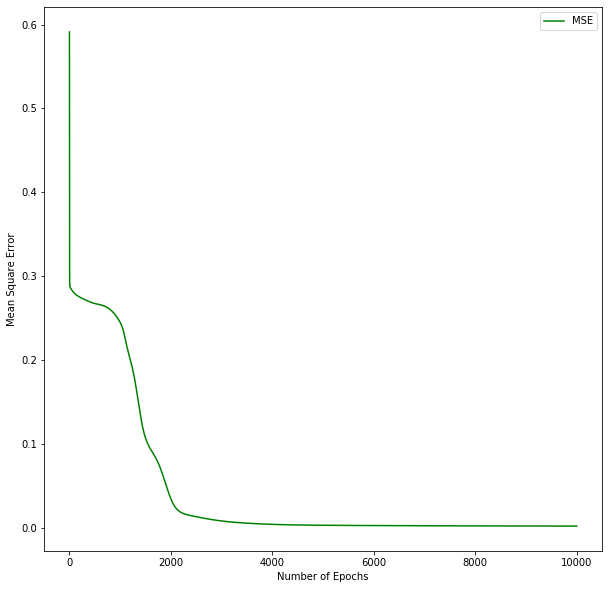

In [8]:
# print(len(v_1s))
# print(len(y_1s))
# print(len(v_2s[1]))
fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epochs')
plt.plot(range(len(MSE)), MSE, c = 'green', label = 'MSE')
plt.legend(loc = 'best')
plt.show() 

In [9]:
y_end = []
for i in range(n):
    y0 = np.array(x[i]).reshape(1, 1)
    int_y0 = np.vstack((unit_vector, y0))
    v_1 = W1 @ int_y0
    y_1 = tan_h(v_1)
    
    int_y1 = np.vstack((unit_vector, y_1))
    v_2 = W2 @ int_y1
    y_2 = output_ac_fn(v_2)
    y_end.append(y_2[0,0])
#print(y_end)

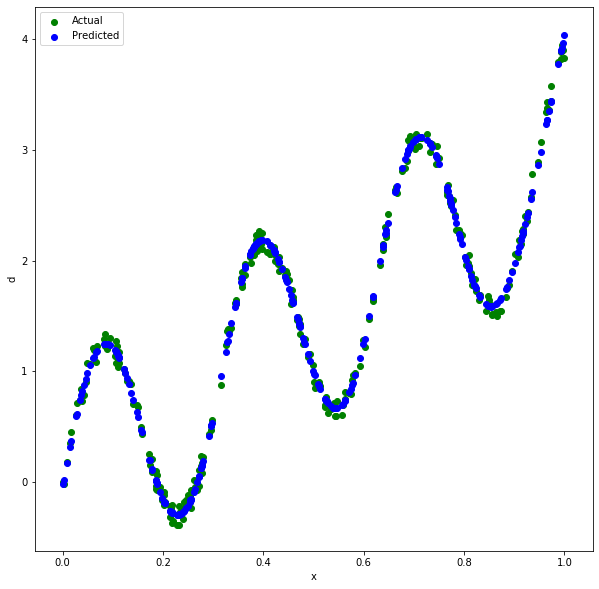

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('d')
plt.xlabel('x')
plt.scatter(x,d, c = 'green', label = 'Actual')
plt.scatter(x,y_end, c = 'blue', label = 'Predicted')
plt.legend(loc = 'best')
plt.show()

